### LogisticRegression : 분류 알고리즘

- LinearRegression : 수치형으로 이루어진 독립변수 X(feature)와 연속적인 숫자로 이루언진 종속변수 y(target)의 관계를 나타내는 회귀계수(w)를 추정하는 모델

- LogisticRegression : 
    - 분류 알고리즘 종속변수가 범주형인 경우 0, 1사이의 범위만 갖는 획률 예측하여 해석한다
    - 성공할 확률을 예측해서 임계치를 넘기면 성공으로 분류, 임계치를 못 넘기면 실패

$$
{\log(\frac{p}{1-p}) = w_0x_0 + w_1x_1 + \cdots +w_mx_m = \sum^m_{i=0}w_ix_i
}
$$
- 가중치  $w_0 \ x_0=1 $ 로 절편을 나타낸다 .
- 로지스틱 회귀는 로그 확률과 다중 설명 변수의 관계를 나타내는 모델의 가중치wi를 학습하는 것이 목적
-
$$
{p = \frac{1}{1+\exp(-\sum^m_{i=0}w_ix_i)}}
$$
- 로지스틱 회귀 = 선형 + 시그모이드함수(0~1) : $$ x, \ t \\ wx+b + sigmoid \\ Y - T = loss $$


In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd
import math
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 수집 -> 데이터 EDA -> 모형 구축 -> 모형 활용(추론 예측) ->모형 평가

In [3]:
# 한글 설정
# plt.rcParams["font.family"]='gulim'
# plt.rcParams["font.size"] = 12

In [4]:
from sklearn.datasets import load_iris 
from sklearn.linear_model import LogisticRegression

In [5]:
# 1. 데이터 수집
# 위치 C:\Anaconda3\pkgs\scikit-learn-1.0.2-py39hf11a4ad_1\Lib\site-packages\sklearn\datasets\data
iris = load_iris()

In [6]:
# 2. 데이터 EDA
# 2-1 . 데이터 전체 출력하고 key값 출력하기
# iris.data
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 2-2 전체 데이터 출력
# 2-3 데이터를 X값으로 저장
X=pd.DataFrame(iris.data)

In [8]:
# 2-4 데이터를 Y항(표적치) 값으로 저장
y=pd.DataFrame(iris.target)

In [9]:
# 2-5 표적치 내용 출력 (iris 품종확인)
pd.DataFrame(iris.target_names)

,0
0,setosa
1,versicolor
2,virginica


In [10]:
# 2-6 특징별 명칭 알아보자
pd.DataFrame(iris.feature_names)

,0
0,sepal length (cm)
1,sepal width (cm)
2,petal length (cm)
3,petal width (cm)


In [11]:
# 2-7 파일이 가진 객체의 설명 출력
# print(iris.DESCR)

In [12]:
# 2-8 저장소를 출력하자
iris.filename

'iris.csv'

In [13]:
#2-9 dataset 타입 확인
iris.data.shape
type(iris.data)

(150, 4)

numpy.ndarray

In [14]:
#2-10 표적치 Y의 타입 확인
iris.target.shape
type(iris.target)

(150,)

numpy.ndarray

In [15]:
#2-11 데이터프레임 인스턴스 생성
iris_df = pd.DataFrame(iris.data)
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
#2-12 컬럼명을 한글로 추가
iris_df.columns=['꽃받침 길이(cm)', '꽃받침 너비(cm)', '꽃입 길이(cm)', '꽃잎 너비(cm)']
iris_df.head()

,꽃받침 길이(cm),꽃받침 너비(cm),꽃입 길이(cm),꽃잎 너비(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
#2-13 표적치 추가
iris_df['품종']=iris.target

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missi

C:\Users\deepBlue\AppData\Local\Temp\ipykernel_16620\4021536543.py:10: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  plt.savefig('../image/iris pairplot.png')
C:\Users\deepBlue\AppData\Local\Temp\ipykernel_16620\4021536543.py:10: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  plt.savefig('../image/iris pairplot.png')
C:\Users\deepBlue\AppData\Local\Temp\ipykernel_16620\4021536543.py:10: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  plt.savefig('../image/iris pairplot.png')
C:\Users\deepBlue\AppData\Local\Temp\ipykernel_16620\4021536543.py:10: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  plt.savefig('../image/iris pairplot.png')
C:\Users\deepBlue\AppData\Local\Temp\ipykernel_16620\4021536543.py:10: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig('../image/iris pairplot.png')
C:\Users\deepBlue\AppData\Local\Temp

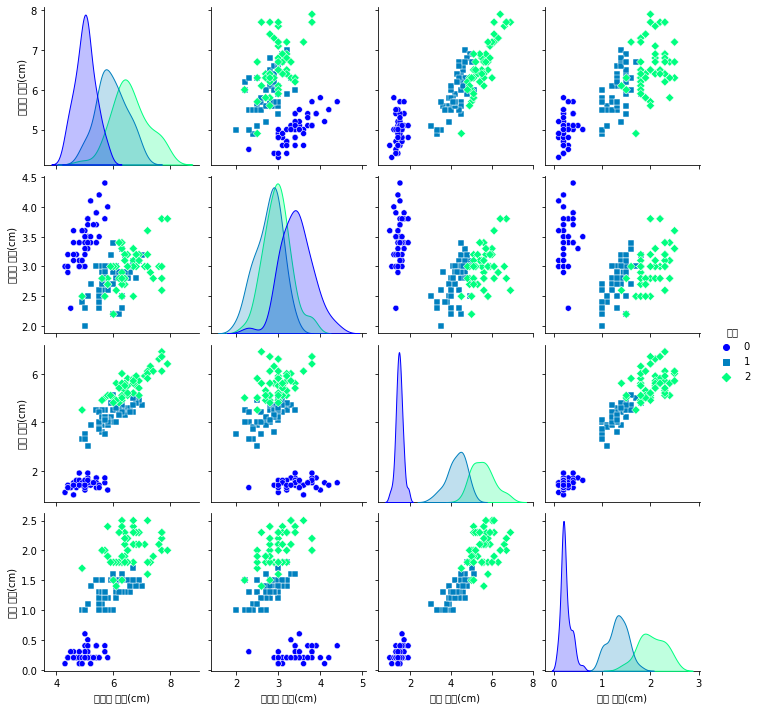

In [18]:
#2-14 시각화
import seaborn as sns
# sns_plot = sns.pairplot(iris_df, hue="품종", palette='winter')
sns.pairplot(iris_df, diag_kind='kde', hue='품종', palette='winter', markers=["o", "s", "D"])

# plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams["font.family"]='gulim'
plt.rcParams["font.size"] = 12

plt.savefig('../image/iris pairplot.png')

plt.show()

In [19]:
# 3. 모형 구축 (전처리 정규화 이후)
logistic = LogisticRegression(max_iter=400)

In [20]:
#3-1 모형 실행
logistic.fit(iris.data,iris.target)

LogisticRegression(max_iter=400)

In [21]:
#3-2 모형 저장
import joblib
joblib.dump(logistic, "ML04_lris_log.pkl")

['ML04_lris_log.pkl']

In [22]:
#3-3 모형 로드
joblib.load("ML04_lris_log.pkl")

LogisticRegression(max_iter=400)

In [23]:
# 4 모형 활용
# iris_pridict 예측값
iris_pridict = logistic.predict(iris.data)
iris_pridict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
#4-1 예측치 , 실측치 비교
# pridict_df
pridict_df = iris_df
pridict_df['iris_pridict'] =iris_pridict
pridict_df

,꽃받침 길이(cm),꽃받침 너비(cm),꽃입 길이(cm),꽃잎 너비(cm),품종,iris_pridict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [25]:
#5 모형평가 = 개선 사항 확인 
# 5-1 평균 제곱 오차
from sklearn.metrics import mean_squared_error, r2_score

print('MSE : %.2f' %r2_score(iris.target,iris_pridict))

MSE : 0.96


In [26]:
# 5-3 confusion_matrix : 분류 작업의 예측력을 확인
from sklearn.metrics import confusion_matrix
confusion_iris = confusion_matrix(iris.target,iris_pridict)
confusion_iris

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

<AxesSubplot:>

Text(0.5, 13.984375, '예측치')

Text(31.984375, 0.5, '실측치')

Text(0.5, 1.04, '붓꽃 혼돈 행렬')

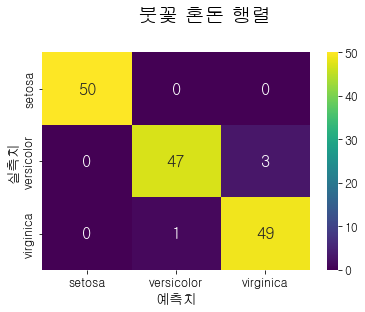

In [27]:
# 5-4 시각화
iris_feature = ['setosa','versicolor','virginica']

sns.heatmap(confusion_iris, annot=True, annot_kws={"size":16}, cmap='viridis',
           xticklabels=iris_feature, yticklabels=iris_feature)

plt.xlabel('예측치',fontsize=14)
plt.ylabel('실측치',fontsize=14)

plt.suptitle('붓꽃 혼돈 행렬', y=1.04,size=20)
plt.show()